<a href="https://colab.research.google.com/github/zia207/Survival_Analysis_Python/blob/main/Colab_Notebook/02_07_06_01_survival_analysis_standard_joint_model_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# 6.1 Standard (Shared Random Effects) Joint Model


The **Standard (Shared Random Effects) Joint Model** is the most widely used framework for simultaneously analyzing **longitudinal biomarker data** and **time-to-event (survival) outcomes**. It explicitly accounts for the fact that the longitudinal measurements (e.g., repeated lab values) and the event process (e.g., death, disease progression) are **interdependent**—often because the underlying health trajectory influences both.

The core idea: **link the two processes through shared subject-specific random effects**, which capture unobserved heterogeneity across individuals.


## Overview


In a mixed-effects longitudinal model, random effects (e.g., random intercepts/slopes) represent individual deviations from the population average trajectory. In a joint model, these **same random effects** are included in the survival submodel to explain differences in event risk. This “sharing” induces correlation between the longitudinal and event processes.


The standard joint model consists of **two submodels**:


**Longitudinal Submodel Typically a Linear Mixed-Effects Model)**

$$
y_i(t) = m_i(t) + \varepsilon_i(t) = \underbrace{x_i^\top(t) \beta}_{\text{Fixed effects}} + \underbrace{z_i^\top(t) b_i}_{\text{Random effects}} + \varepsilon_i(t)
$$

- $y_i(t)$: observed longitudinal outcome for subject $i$ at time $t$
- $x_i(t)$: vector of fixed-effect covariates (e.g., time, treatment)
- $\beta$: fixed-effect coefficients
- $z_i(t)$: design vector for random effects (often includes intercept and time)
- $b_i \sim \mathcal{N}(0, D)$: subject-specific random effects (e.g., random intercept $b_{0i}$, random slope $b_{1i}$
- $\varepsilon_i(t) \sim \mathcal{N}(0, \sigma^2)$: measurement error, independent of $b_i$)

The **true (unobserved) longitudinal trajectory** is:

$$
m_i(t) = x_i^\top(t)\beta + z_i^\top(t)b_i
$$

**Survival (Event Time) Submodel (Typically a relative risk model with baseline hazard)**

$$
h_i(t) = h_0(t) \exp\left( w_i^\top \gamma + \alpha \cdot \eta\big(m_i(t), b_i, t\big) \right)
$$

- $h_i(t)$: hazard of the event for subject $i$ at time $t$
- $h_0(t)$: baseline hazard function (can be parametric like Weibull, or semi-parametric using splines)
- $w_i \): vector of baseline/time-independent covariates (e.g., age, treatment group)
- $gamma$: log-hazard ratios for covariates
- $\alpha$: **association parameter** — quantifies how the longitudinal process affects event risk
- $\eta(\cdot)$): **association structure** linking longitudinal and survival processes


### Common Association Structures $\eta(\cdot)$


The choice of $\eta$ defines how the biomarker influences risk:

| Association Type | Form | Interpretation |
|------------------|------|----------------|
| **Current value** | $\eta = m_i(t)$ | Instantaneous biomarker level affects current hazard |
| **Current slope** | $\eta = m_i'(t) = \frac{d}{dt}m_i(t)$ | Rate of change (e.g., rapid decline) affects risk |
| **Random effects** | $\eta = b_i$ | Subject’s deviation from population (e.g., low baseline) affects baseline hazard |
| **Combined** | $\eta = m_i(t) + m_i'(t)$ | Both level and trend matter |

> The **current value** parameterization is the most common and often serves as the "standard" joint model.


### Key Assumptions


- **Conditional independence**: Given the random effects \( b_i \) (and thus \( m_i(t) \)), the longitudinal and event processes are independent.
- **Normality**: Random effects \( b_i \sim \mathcal{N}(0, D) \); measurement errors \( \varepsilon_i \sim \mathcal{N}(0, \sigma^2) \).
- **Correct specification** of the association structure and baseline hazard.


### Estimation


Typically done via **maximum likelihood**:

$$
L(\theta) = \prod_{i=1}^n \left[ \int f(y_i \mid b_i; \theta_L) \cdot f(T_i, \delta_i \mid b_i; \theta_S) \cdot f(b_i; D)  \, db_i \right]
$$
- $\theta = (\theta_L, \theta_S, D, \sigma^2, \alpha)$: full parameter vector
- Integration over \( b_i \) is done numerically (e.g., **Gauss-Hermite quadrature** or **Monte Carlo**)
- Alternatively, **Bayesian MCMC** can be used



### Advantages


- Reduces **bias from informative dropout** (e.g., patients with worsening biomarkers drop out and die)
- Accounts for **measurement error** in biomarkers
- Enables **dynamic predictions**: update survival probability as new longitudinal data arrive
- Provides **mechanistic insight**: quantifies how biomarker trajectories drive risk



### Example


> **Study**: Prostate cancer patients monitored via repeated PSA (prostate-specific antigen) tests; event = metastasis.
>
> - **Longitudinal**: PSA modeled with random intercept/slope.
> - **Survival**: Hazard of metastasis depends on **current true PSA level**.
> - **Result**: Higher PSA trajectory → significantly increased metastasis risk (\( \hat{\alpha} > 0 \)).

This fits the standard shared random effects joint model with current-value association.



## Cheeck and Load Required Packages

In [1]:
import subprocess
import sys

def install_and_import(package_name, import_name=None):
    """Install a package if not already installed and import it"""
    if import_name is None:
        import_name = package_name

    try:
        # Try to import the package
        globals()[import_name] = __import__(import_name)
        print(f"{package_name} is already installed")
    except ImportError:
        # If not installed, install it
        print(f"Installing {package_name}...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
            globals()[import_name] = __import__(import_name)
            print(f"{package_name} installed successfully")
        except Exception as e:
            print(f"Failed to install {package_name}: {e}")
            raise

# List of packages to check/install
packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scikit-learn', 'scikit-survival', 'lifelines', 'statsmodels', 'pymer4', 'PyMC', 'polars']

# Install and import each package
for pkg in packages:
    try:
        install_and_import(pkg)
    except Exception as e:
        print(f"Error with package {pkg}: {e}")

# Verify installation by importing
print("Installed packages:")
for pkg in packages:
    try:
        __import__(pkg)
        print(f"✓ {pkg}")
    except ImportError:
        print(f"✗ {pkg}")

pandas is already installed
numpy is already installed
matplotlib is already installed
seaborn is already installed
Installing scikit-learn...
Failed to install scikit-learn: No module named 'scikit-learn'
Error with package scikit-learn: No module named 'scikit-learn'
Installing scikit-survival...
Failed to install scikit-survival: No module named 'scikit-survival'
Error with package scikit-survival: No module named 'scikit-survival'
Installing lifelines...
lifelines installed successfully
statsmodels is already installed
Installing pymer4...
Failed to install pymer4: No module named 'great_tables'
Error with package pymer4: No module named 'great_tables'
Installing PyMC...
Failed to install PyMC: No module named 'PyMC'
Error with package PyMC: No module named 'PyMC'
polars is already installed
Installed packages:
✓ pandas
✓ numpy
✓ matplotlib
✓ seaborn
✗ scikit-learn
✗ scikit-survival
✓ lifelines
✓ statsmodels
✗ pymer4
✗ PyMC
✓ polars


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from lifelines import CoxPHFitter
from scipy import optimize, stats
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## Implementation in Python

Python does not yet have a fully mature, single high-level package like R’s `JM`, `JMbayes2`, or `joineRML`.
However, you can fit a shared random-effects joint model using `pyjm`, `lifelines` + `statsmodels`, or full Bayesian modeling with `PyMC` (most flexible and closest to standard JM).

#### Data


We'll use the `aids` dataset from the {JM} package to demonstrate how to perform joint modeling of longitudinal and time-to-event data in R. A randomized clinical trial in which both longitudinal and survival data were collected to compare the efficacy and safety of two antiretroviral drugs in treating patients who had failed or were intolerant of zidovudine (`AZT`) therapy. The dataset contains information on patients' CD4 cell counts (`CD4`) and survival status (`death`) over time, along with other covariates. The goal is to model the relationship between `CD4` cell counts and survival outcomes.

The dataset used is the same that the one seen with the mixed model, `aids`. The survival information can be found in `aids.id`.

A data frame with 1408 observations on the following 9 variables.

`patiet`: patients identifier; in total there are 467 patients.

`Time`: the time to death or censoring.

`death`: a numeric vector with 0 denoting censoring and 1 death.

`CD4`: the CD4 cells count.

`obstime`: the time points at which the CD4 cells count was recorded.

`drug`: a factor with levels ddC denoting zalcitabine and ddI denoting didanosine.

`gender`: a factor with levels female and male.

`prevOI`: a factor with levels AIDS denoting previous opportunistic infection (AIDS diagnosis) at study entry, and noAIDS denoting no previous infection.

`AZT`: a factor with levels intolerance and failure denoting AZT intolerance and AZT failure, respectively.


In [3]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Load the datasets
url_aids = "https://raw.githubusercontent.com/zia207/Survival_Analysis_Python/main/Data/aids.csv"
url_aids_id = "https://raw.githubusercontent.com/zia207/Survival_Analysis_Python/main/Data/aids_id.csv"

aids = pd.read_csv(url_aids)
aids_id = pd.read_csv(url_aids_id)

print("Longitudinal dataset shape:", aids.shape)
print("Survival dataset shape:", aids_id.shape)
print("\nLongitudinal data preview:")
print(aids.head())
print("\nSurvival data preview:")
print(aids_id.head())

Longitudinal dataset shape: (1405, 12)
Survival dataset shape: (467, 12)

Longitudinal data preview:
   patient   Time  death        CD4  obstime drug gender  prevOI          AZT  \
0        1  16.97      0  10.677078        0  ddC   male    AIDS  intolerance   
1        1  16.97      0   8.426150        6  ddC   male    AIDS  intolerance   
2        1  16.97      0   9.433981       12  ddC   male    AIDS  intolerance   
3        2  19.00      0   6.324555        0  ddI   male  noAIDS  intolerance   
4        2  19.00      0   8.124038        6  ddI   male  noAIDS  intolerance   

   start   stop  event  
0      0   6.00      0  
1      6  12.00      0  
2     12  16.97      0  
3      0   6.00      0  
4      6  12.00      0  

Survival data preview:
   patient   Time  death        CD4  obstime drug  gender  prevOI  \
0        1  16.97      0  10.677078        0  ddC    male    AIDS   
1        2  19.00      0   6.324555        0  ddI    male  noAIDS   
2        3  18.53      1   3.46

### Understanding the Data Structure

In [4]:
def explore_data(aids_df, aids_id_df):
    """Brief summary of datasets and essential conversions."""
    # Convert 'drug' column to numeric for both datasets
    aids_df['drug'] = aids_df['drug'].map({'ddC': 0, 'ddI': 1}) if aids_df['drug'].dtype == 'object' else aids_df['drug']
    aids_id_df['drug'] = aids_id_df['drug'].map({'ddC': 0, 'ddI': 1}) if aids_id_df['drug'].dtype == 'object' else aids_id_df['drug']

    print("Longitudinal: patients =", aids_df['patient'].nunique(),
          "obs =", len(aids_df),
          f"CD4 range: {aids_df['CD4'].min():.1f}-{aids_df['CD4'].max():.1f}")

    print("Survival: median time =", aids_id_df['Time'].median(),
          f"deaths: {aids_id_df['death'].sum()} / {len(aids_id_df)}")
    return aids_df, aids_id_df

aids, aids_id = explore_data(aids, aids_id)

Longitudinal: patients = 467 obs = 1405 CD4 range: 0.0-24.1
Survival: median time = 13.2 deaths: 188 / 467


### Data Visualization


The `visualize_datasets` function provides an in-depth visual summary of the AIDS study data through six plots arranged in a 2x3 grid (using matplotlib). These plots help reveal key patterns in both the longitudinal (CD4 measurements) and survival (time-to-event) datasets.

**What Each Subplot Shows:**

1. **Individual CD4 Trajectories** *(Top left, axes[0, 0])*  
   - Shows CD4 count over time for the first 15 patients, colored by treatment: red for ddC, blue for ddI.
   - Highlights individual CD4 trends and differences between treatment groups.

2. **Kaplan-Meier Survival Curves** *(Top middle, axes[0, 1])*  
   - Displays estimated survival probabilities using Kaplan-Meier estimators.
   - Includes an overall curve plus treatment-specific curves (red=ddC, blue=ddI) for comparison between groups.

3. **Histogram of CD4 Counts** *(Top right, axes[0, 2])*  
   - Visualizes the overall distribution of CD4 values, illustrating spread, central tendency, and outliers.

4. **CD4 vs. Time by Treatment** *(Bottom left, axes[1, 0])*  
   - Scatterplot of CD4 count against time for all observations, colored by treatment.
   - Reveals patterns in CD4 changes over time and preliminary treatment effects.

5. **Boxplot of CD4 by Drug** *(Bottom middle, axes[1, 1])*  
   - Side-by-side boxplots show the spread and median CD4 counts for each treatment group (0=ddC, 1=ddI).

6. **Histogram: Number of Observations per Patient** *(Bottom right, axes[1, 2])*  
   - Plots the distribution of the number of longitudinal measurements each patient contributed, clarifying data frequency and variability per patient.

*After defining the function, it is called as `visualize_datasets(aids, aids_id)` to actually display these plots for the loaded AIDS datasets.*

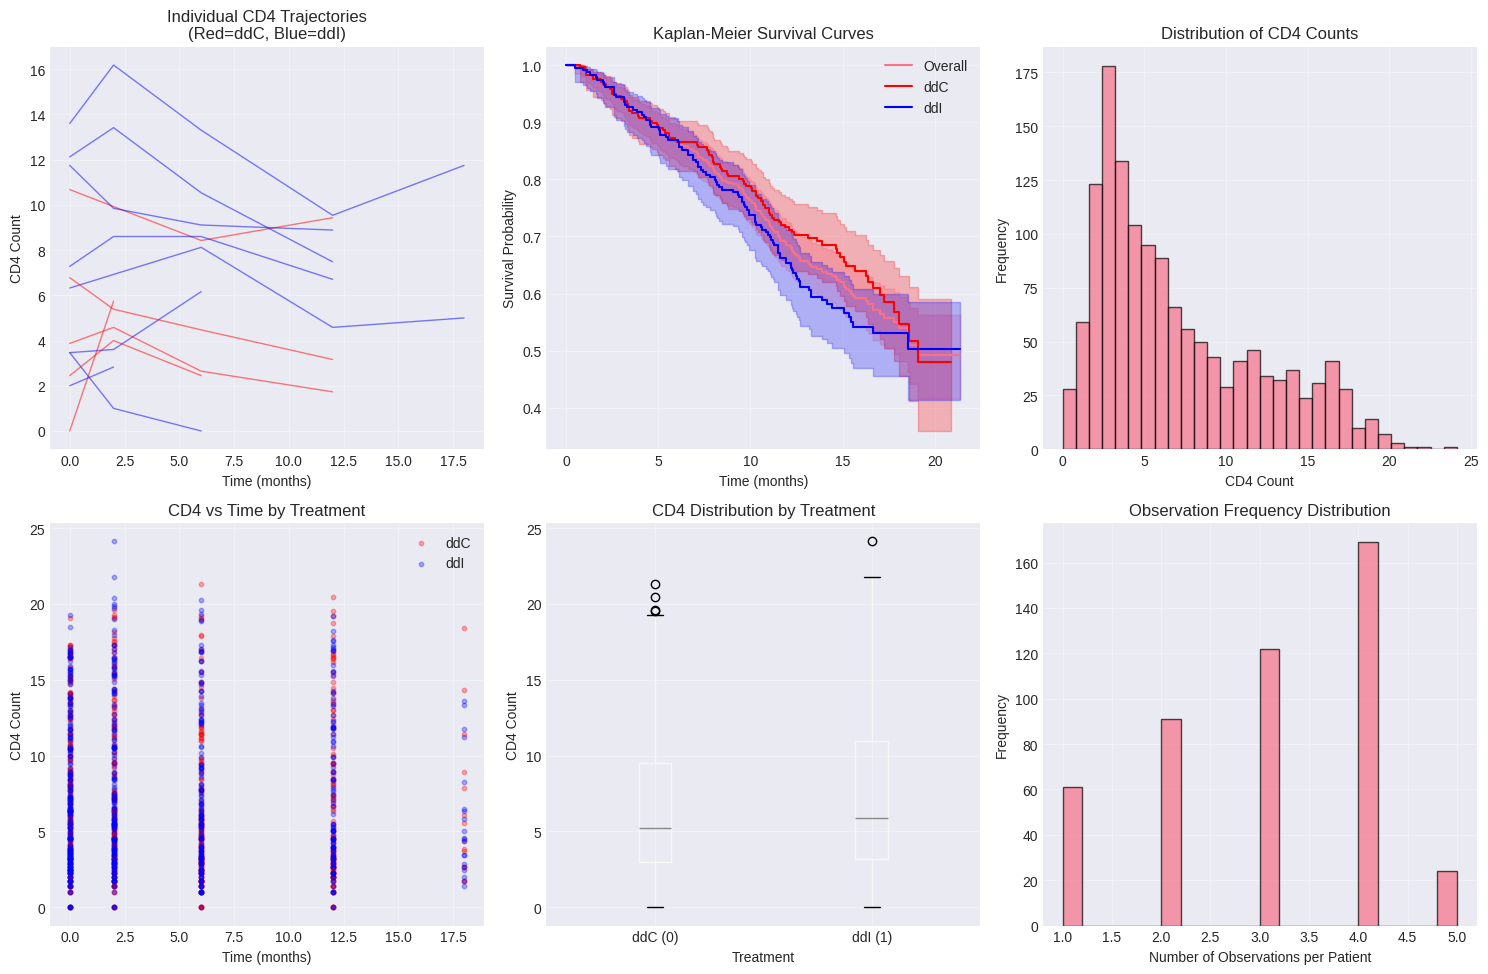

In [5]:
def visualize_datasets(aids_df, aids_id_df):
    """Create comprehensive visualizations"""

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # 1. CD4 trajectories for individual patients
    ax = axes[0, 0]
    for patient in aids_df['patient'].unique()[:15]:
        patient_data = aids_df[aids_df['patient'] == patient]
        color = 'red' if patient_data['drug'].iloc[0] == 0 else 'blue'
        ax.plot(patient_data['obstime'], patient_data['CD4'],
                color=color, alpha=0.5, linewidth=1)
    ax.set_xlabel('Time (months)')
    ax.set_ylabel('CD4 Count')
    ax.set_title('Individual CD4 Trajectories\n(Red=ddC, Blue=ddI)')
    ax.grid(True, alpha=0.3)

    # 2. Kaplan-Meier survival curve
    ax = axes[0, 1]
    from lifelines import KaplanMeierFitter
    kmf = KaplanMeierFitter()

    # Plot overall survival
    kmf.fit(aids_id_df['Time'], event_observed=aids_id_df['death'])
    kmf.plot_survival_function(ax=ax, label='Overall')

    # Plot by treatment
    for drug, color, label in [(0, 'red', 'ddC'), (1, 'blue', 'ddI')]:
        kmf_drug = KaplanMeierFitter()
        drug_data = aids_id_df[aids_id_df['drug'] == drug]
        kmf_drug.fit(drug_data['Time'], event_observed=drug_data['death'])
        kmf_drug.plot_survival_function(ax=ax, color=color, label=label)

    ax.set_xlabel('Time (months)')
    ax.set_ylabel('Survival Probability')
    ax.set_title('Kaplan-Meier Survival Curves')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # 3. Distribution of CD4 counts
    ax = axes[0, 2]
    ax.hist(aids_df['CD4'], bins=30, edgecolor='black', alpha=0.7)
    ax.set_xlabel('CD4 Count')
    ax.set_ylabel('Frequency')
    ax.set_title('Distribution of CD4 Counts')
    ax.grid(True, alpha=0.3)

    # 4. CD4 by treatment over time
    ax = axes[1, 0]
    for drug, color, label in [(0, 'red', 'ddC'), (1, 'blue', 'ddI')]:
        drug_data = aids_df[aids_df['drug'] == drug]
        ax.scatter(drug_data['obstime'], drug_data['CD4'],
                  color=color, alpha=0.3, s=10, label=label)
    ax.set_xlabel('Time (months)')
    ax.set_ylabel('CD4 Count')
    ax.set_title('CD4 vs Time by Treatment')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # 5. Boxplot of CD4 by drug
    ax = axes[1, 1]
    aids_df.boxplot(column='CD4', by='drug', ax=ax)
    ax.set_xlabel('Treatment')
    ax.set_ylabel('CD4 Count')
    ax.set_title('CD4 Distribution by Treatment')
    ax.set_xticklabels(['ddC (0)', 'ddI (1)'])
    ax.grid(True, alpha=0.3)
    plt.suptitle('')  # Remove automatic title

    # 6. Observation times distribution
    ax = axes[1, 2]
    observation_counts = aids_df.groupby('patient').size()
    ax.hist(observation_counts, bins=20, edgecolor='black', alpha=0.7)
    ax.set_xlabel('Number of Observations per Patient')
    ax.set_ylabel('Frequency')
    ax.set_title('Observation Frequency Distribution')
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Generate visualizations
visualize_datasets(aids, aids_id)

## Two-Stage Approach (Simplified Joint Model)

The Two-Stage Approach is a simplified method for analyzing the relationship between longitudinal measurements (like CD4 counts over time) and survival outcomes (like time to death). It's called "two-stage" because it breaks the complex problem into two simpler steps:

* Stage 1: Fit a mixed effects model to longitudinal data (CD4 measurements over time)

* Stage 2: Use predictions from Stage 1 as covariates in a survival model

### Initialization and Setup

- Creates a class to organize all joint modeling operations

- Initializes attributes to None (they'll be filled when we fit models)

- long_model: Will hold the mixed effects model for CD4 trajectories

- surv_model: Will hold the Cox model for survival

- random_effects: Will hold individual patient deviations from average

### Fit Longitudinal Mixed Effects Model

`fit_longitudinal(data, formula="CD4 ~ obstime + drug")`: Implements Stage 1 of the joint model: fitting a linear mixed-effects model to the longitudinal data.


-   It uses `statsmodels.formula.api.mixedlm` to build a mixed-effects model. This type of model is suitable for data where observations are grouped (e.g., multiple CD4 measurements from the same patient) and assumes both fixed effects (e.g., `obstime`, `drug`) and random effects (patient-specific variations in intercept and slope).

-   `groups=data["patient"]` specifies that the `patient` column defines the groups for random effects.

-   `re_formula="~obstime"` indicates that each patient has a random intercept and a random slope for `obstime`.

-   `self.long_result.summary()` prints a statistical summary of the fitted longitudinal model.

-   It extracts the `random_effects` (patient-specific deviations from the population average) and stores them.

-   It predicts CD4 values based on the fitted longitudinal model and adds them as a new column `predicted_CD4` to the input `data`.

  -   Finally, it calls `_calculate_patient_slopes` to determine each patient's individual CD4 slope.

In [6]:
# Helper functions for the TwoStageJointModel (re-introduced from earlier notebook state)
def fit_longitudinal_ts(data, formula="CD4 ~ obstime + drug"):
    long_model = smf.mixedlm(formula,
                             data=data,
                             groups=data["patient"],
                             re_formula="~obstime")
    long_result = long_model.fit()
    random_effects = long_result.random_effects
    data = data.copy()
    data['predicted_CD4'] = long_result.predict(data)
    return long_result, random_effects, data

#### Calculate Patient Slopes

`_calculate_patient_slopes(data)`: A helper method to calculate the CD4 slope for each patient from their longitudinal data.

- It iterates through each unique `patient` in the longitudinal `data`.
- For patients with more than one observation, it performs a simple linear regression (`np.polyfit`) of `CD4` against `obstime` to get an individual slope.
- If a patient has only one observation, their slope is set to 0 (as a slope cannot be determined from a single point).
- These patient-specific slopes are stored in `self.patient_slopes`.

In [7]:
def _calculate_patient_slopes_ts(data):
    patient_slopes = {}
    patients = data['patient'].unique()
    for patient in patients:
        patient_data = data[data['patient'] == patient]
        if len(patient_data) > 1:
            slope, intercept = np.polyfit(patient_data['obstime'],
                                          patient_data['CD4'], 1)
            patient_slopes[patient] = slope
        else:
            patient_slopes[patient] = 0
    return patient_slopes

### Prepare Survival Data with Longitudinal Predictions

`prepare_survival_data(long_data, surv_data)`: Prepares the survival data by incorporating relevant information derived from the longitudinal model.

-   This method iterates through each patient present in both the longitudinal and survival datasets.
-   For each patient, it extracts their survival information (`Time`, `death`, `drug`) from `surv_data`.
-   From the longitudinal data (`long_data`), it extracts key features like the `last_cd4` measurement, `baseline_cd4`, and the previously calculated `cd4_slope`.
-   It also retrieves the random effects (`re_intercept`, `re_slope`) that were estimated by the mixed-effects model for each patient.
 -   All this information is then combined to create a new `survival_data` DataFrame, which will be used in the survival model. This step is crucial for linking the longitudinal and survival outcomes.


In [8]:
def prepare_survival_data_ts(long_data, surv_data, patient_slopes, random_effects):
    survival_records = []
    patients_in_surv = surv_data['patient'].unique()
    for patient in patients_in_surv:
        patient_long = long_data[long_data['patient'] == patient]
        try:
            patient_surv = surv_data[surv_data['patient'] == patient].iloc[0]
        except IndexError: # Handle case where patient might not be in surv_data
            continue
        if len(patient_long) > 0:
            last_cd4 = patient_long['CD4'].iloc[-1]
            baseline_cd4 = patient_long['CD4'].iloc[0] if len(patient_long) > 0 else last_cd4
            slope = patient_slopes.get(patient, 0)
            re = random_effects.get(patient, {0: 0, 'obstime': 0})
            re_intercept = re.get(0, 0)
            re_slope = re.get('obstime', 0)
            record = {
                'patient': patient,
                'time': patient_surv['Time'],
                'event': patient_surv['death'],
                'drug': patient_surv['drug'],
                'last_cd4': last_cd4,
                'baseline_cd4': baseline_cd4,
                'cd4_slope': slope,
                're_intercept': re_intercept,
                're_slope': re_slope,
                'n_observations': len(patient_long)
            }
            survival_records.append(record)
    survival_data = pd.DataFrame(survival_records)
    return survival_data

### Fit Survival Model

`fit_survival(formula="drug + last_cd4 + re_slope")`: Implements Stage 2 of the joint model: fitting a survival model using the prepared data.

-   It uses `lifelines.CoxPHFitter` to fit a Cox Proportional Hazards model.

-   The `cox_data` (derived from the `survival_data` prepared in the previous step) contains both baseline covariates (like `drug`) and the longitudinal features (`last_cd4`, `re_slope`).

-   The `duration_col` is set to `'time'` (representing the survival time) and `event_col` to `'event'` (indicating if an event, like death, occurred).

-   The `formula` specifies the covariates included in the survival model, allowing investigation of their impact on hazard.

-   `self.surv_model.summary` prints a statistical summary of the fitted survival model, including hazard ratios and p-values for each covariate.

In [9]:
def fit_survival_ts(survival_data, formula="drug + last_cd4 + re_slope"):
    cox_data = survival_data.copy()
    for col in cox_data.columns:
        if col not in ['patient']:
            cox_data[col] = pd.to_numeric(cox_data[col], errors='coerce')
    cox_data = cox_data.dropna()
    surv_model = CoxPHFitter()
    surv_model.fit(cox_data,
                   duration_col='time',
                   event_col='event',
                   formula=formula)
    return surv_model, cox_data

### Fit Model

`fit(long_data, surv_data)`: Orchestrates the entire two-stage fitting process. This is a convenience method that calls fit_longitudinal, then prepare_survival_data, and finally fit_survival in the correct sequence to build the complete two-stage joint model.

In [10]:
def fit(long_data, surv_data, formula_long="CD4 ~ obstime + drug", formula_surv="drug + last_cd4 + re_slope"):
    """
    Fit the complete two-stage model. Returns all intermediate results for further steps.
    """
    long_result, random_effects, long_data_pred = fit_longitudinal_ts(long_data, formula_long)
    patient_slopes = _calculate_patient_slopes_ts(long_data_pred)
    survival_data = prepare_survival_data_ts(long_data_pred, surv_data, patient_slopes, random_effects)
    surv_model, cox_data = fit_survival_ts(survival_data, formula=formula_surv)
    return {
        'long_result': long_result,
        'random_effects': random_effects,
        'long_data': long_data_pred,
        'patient_slopes': patient_slopes,
        'survival_data': survival_data,
        'surv_model': surv_model,
        'cox_data': cox_data
    }

### Prediction of Survival Probabilities

`predict_survival(self, new_data, time_points=None)`: Predicts survival probabilities for new patient data using the fitted survival model.

-   This method takes `new_data` (containing the relevant covariates for prediction) and optional `time_points`.

-   It uses the `predict_survival_function` method of the `CoxPHFitter` to generate survival probability curves.

-   If `time_points` are provided, it predicts survival at those specific time points; otherwise, it uses the observed time points from the model.

In [11]:
def predict_survival(surv_model, new_data, time_points=None):
    """
    Predict survival probabilities for given new_data (must match CoxPH columns).
    """
    if surv_model is None:
        raise ValueError("Must fit survival model first")
    if time_points is None:
        survival_pred = surv_model.predict_survival_function(new_data)
    else:
        survival_pred = surv_model.predict_survival_function(new_data, times=time_points)
    return survival_pred

### Visulaize the Results

`plot_results(self)`: Visualizes key aspects of the two-stage model results.

This method generates a series of plots to help interpret the model:

    -   **Random effects distribution:** Histograms of random intercepts and slopes from the longitudinal model, showing patient-specific variations.

    -   **Survival curves by treatment:** Predicted survival curves based on the fitted survival model, stratified by treatment group.

    -   **Hazard ratios:** A bar plot showing the hazard ratios for covariates in the survival model, along with their confidence intervals.

    -   **Predicted vs observed CD4:** Compares the mixed-effects model's predictions to actual CD4 measurements for a sample of patients.

    -   **Residuals from longitudinal model:** Plots the residuals of the longitudinal model to check for model fit assumptions.

    -   **Partial dependence plot for CD4:** Shows how the last CD4 count influences the hazard rate according to the survival model.

In [12]:
def plot_results(results, aids):
    """
    Visualize model results.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    random_effects = results['random_effects']
    survival_data = results['survival_data']
    surv_model = results['surv_model']
    long_result = results['long_result']

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    # 1. Random effects distribution
    ax = axes[0, 0]
    intercepts = [re.get(0, 0) for re in random_effects.values()]
    slopes = [re.get('obstime', 0) for re in random_effects.values()]
    ax.hist(intercepts, bins=20, alpha=0.7, label='Intercepts', density=True)
    ax.hist(slopes, bins=20, alpha=0.7, label='Slopes', density=True)
    ax.set_xlabel('Random Effect Value')
    ax.set_ylabel('Density')
    ax.set_title('Distribution of Random Effects')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # 2. Survival curves by treatment
    ax = axes[0, 1]
    median_cd4 = survival_data['last_cd4'].median()
    median_slope = survival_data['re_slope'].median()
    for drug, color, label in [(0, 'red', 'ddC'), (1, 'blue', 'ddI')]:
        representative = pd.DataFrame({
            'drug': [drug],
            'last_cd4': [median_cd4],
            're_slope': [median_slope]
        })
        try:
            survival_pred = predict_survival(surv_model, representative)
            ax.plot(survival_pred.index, survival_pred.values.flatten(),
                    color=color, label=label, linewidth=2)
        except Exception as e:
            pass
    ax.set_xlabel('Time (months)')
    ax.set_ylabel('Survival Probability')
    ax.set_title('Predicted Survival by Treatment')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # 3. Hazard ratios
    ax = axes[0, 2]
    if hasattr(surv_model, 'params_'):
        hazard_ratios = np.exp(surv_model.params_)
        conf_intervals = np.exp(surv_model.confidence_intervals_)
        x_pos = range(len(hazard_ratios))
        ax.bar(x_pos, hazard_ratios.values, alpha=0.7)
        ax.set_xticks(x_pos)
        ax.set_xticklabels(hazard_ratios.index, rotation=45, ha='right')
        for i, (lower, upper) in enumerate(conf_intervals.values):
            ax.plot([i, i], [lower, upper], color='black', linewidth=2)
            ax.plot([i-0.1, i+0.1], [lower, lower], color='black', linewidth=1)
            ax.plot([i-0.1, i+0.1], [upper, upper], color='black', linewidth=1)
        ax.axhline(y=1, color='red', linestyle='--', alpha=0.5)
        ax.set_ylabel('Hazard Ratio')
        ax.set_title('Hazard Ratios with 95% CI')
        ax.grid(True, alpha=0.3)
    else:
        pass

    # 4. Predicted vs observed CD4
    ax = axes[1, 0]
    sample_patients = list(aids['patient'].unique())[:5]
    for patient in sample_patients:
        patient_data = aids[aids['patient'] == patient]
        ax.scatter(patient_data['obstime'], patient_data['CD4'],
                   alpha=0.6, s=20, label=f'Patient {patient}')
        if hasattr(long_result, 'predict'):
            try:
                times = np.linspace(0, patient_data['obstime'].max(), 50)
                X_pred = pd.DataFrame({
                    'obstime': times,
                    'drug': [patient_data['drug'].iloc[0]] * len(times)
                })
                predictions = long_result.predict(X_pred)
                ax.plot(times, predictions, alpha=0.8, linewidth=2)
            except Exception as e:
                pass
    ax.set_xlabel('Time (months)')
    ax.set_ylabel('CD4 Count')
    ax.set_title('CD4 Trajectories with Predictions')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # 5. Residuals from longitudinal model
    ax = axes[1, 1]
    if hasattr(long_result, 'predict'):
        try:
            residuals = aids['CD4'] - long_result.predict(aids)
            ax.scatter(long_result.predict(aids), residuals, alpha=0.5)
            ax.axhline(y=0, color='red', linestyle='--')
            ax.set_xlabel('Predicted CD4')
            ax.set_ylabel('Residuals')
            ax.set_title('Residuals vs Fitted Values')
            ax.grid(True, alpha=0.3)
        except Exception as e:
            pass

    # 6. Partial dependence plot for CD4
    ax = axes[1, 2]
    if hasattr(surv_model, 'params_') and 'last_cd4' in surv_model.params_:
        cd4_values = np.linspace(survival_data['last_cd4'].min(),
                                 survival_data['last_cd4'].max(), 20)
        hazards = []
        for cd4 in cd4_values:
            test_patient = pd.DataFrame({
                'drug': [0.5],
                're_slope': [0],
                'last_cd4': [cd4]
            })
            try:
                hazard = surv_model.predict_partial_hazard(test_patient).iloc[0]
                hazards.append(hazard)
            except Exception as e:
                hazards.append(np.nan)
        ax.plot(cd4_values, hazards, linewidth=2)
        ax.set_xlabel('Last CD4 Count')
        ax.set_ylabel('Partial Hazard')
        ax.set_title('Effect of CD4 on Hazard')
        ax.grid(True, alpha=0.3)
    else:
        pass

    plt.tight_layout()
    plt.show()

### Model Evaluation

`evaluate_model(self)`: Evaluates the performance of the fitted models.

-   For the survival component, it calculates the **Concordance Index (C-index)** using `lifelines.utils.concordance_index`. The C-index measures the discriminative power of the survival model (how well it can distinguish between high-risk and low-risk patients).

-   For the longitudinal component, it calculates the **R-squared** value, indicating how well the mixed-effects model explains the

In [13]:
def evaluate_model(results, aids):
    """
    Evaluate model performance: C-index and longitudinal R2.
    """
    from lifelines.utils import concordance_index
    surv_model = results['surv_model']
    survival_data = results['survival_data']
    long_result = results['long_result']
    c_index = None
    if hasattr(surv_model, 'predict_partial_hazard'):
        try:
            predictions = surv_model.predict_partial_hazard(survival_data)
            c_index = concordance_index(survival_data['time'],
                                       -predictions,  # Negative because higher hazard = shorter survival
                                       survival_data['event'])
            print(f"Concordance Index (C-index): {c_index:.3f}")
            if c_index < 0.6:
                print("Model discrimination: Poor")
            elif c_index < 0.7:
                print("Model discrimination: Fair")
            elif c_index < 0.8:
                print("Model discrimination: Good")
            else:
                print("Model discrimination: Excellent")
        except Exception as e:
            pass
    else:
        pass
    if hasattr(long_result, 'predict'):
        try:
            import numpy as np
            ss_residual = np.sum((aids['CD4'] - long_result.predict(aids)) ** 2)
            ss_total = np.sum((aids['CD4'] - aids['CD4'].mean()) ** 2)
            r_squared = 1 - (ss_residual / ss_total)
            print(f"Longitudinal model R-squared: {r_squared:.3f}")
        except Exception as e:
            pass
    else:
        pass
    return c_index

### Fit Two-stage Model

In [14]:
# Check if required functions, modules, and data are available
required_functions = ['fit_longitudinal_ts', '_calculate_patient_slopes_ts',
                     'prepare_survival_data_ts', 'fit_survival_ts', 'fit']
missing_functions = [f for f in required_functions if f not in globals()]

# Check if required modules (such as smf) are imported
missing_modules = []
try:
    import statsmodels.formula.api as smf
except ImportError:
    missing_modules.append('statsmodels.formula.api as smf')
except Exception:
    missing_modules.append('smf')
try:
    from lifelines import CoxPHFitter
except ImportError:
    missing_modules.append('lifelines.CoxPHFitter')
except Exception:
    missing_modules.append('CoxPHFitter')

if missing_functions or missing_modules:
    if missing_functions:
        print(f"Error: Missing required functions: {', '.join(missing_functions)}")
    if missing_modules:
        print(f"Error: Missing required imports: {', '.join(missing_modules)}")
    print("Please run Cells 17, 29, 31, 33, 35, and 37 first to define these functions and import modules.")
    print("Cell 17: Imports (including smf and CoxPHFitter)")
    print("Cell 29: fit_longitudinal_ts")
    print("Cell 31: _calculate_patient_slopes_ts")
    print("Cell 33: prepare_survival_data_ts")
    print("Cell 35: fit_survival_ts")
    print("Cell 37: fit (main function)")
elif 'aids' not in globals() or 'aids_id' not in globals():
    print("Error: 'aids' or 'aids_id' not found in global scope")
    print("Please run Cells 21 and 23 first to load the data.")
else:
    try:
        results = fit(aids, aids_id)
        print("Model fitted successfully!")
        if results is not None and hasattr(results, 'keys'):
            print(f"Results dictionary keys: {list(results.keys())}")
        else:
            print("Error: 'results' is not a valid dictionary or missing keys attribute.")
    except NameError as ne:
        print(f"NameError: {ne}")
        print("Please ensure all helper functions and imports are defined by running Cells 17, 29, 31, 33, 35, and 37.")
    except Exception as e:
        print(f"Error while fitting the model: {e}")
        import traceback
        traceback.print_exc()

Model fitted successfully!
Results dictionary keys: ['long_result', 'random_effects', 'long_data', 'patient_slopes', 'survival_data', 'surv_model', 'cox_data']


#### Visualizaetion of Results

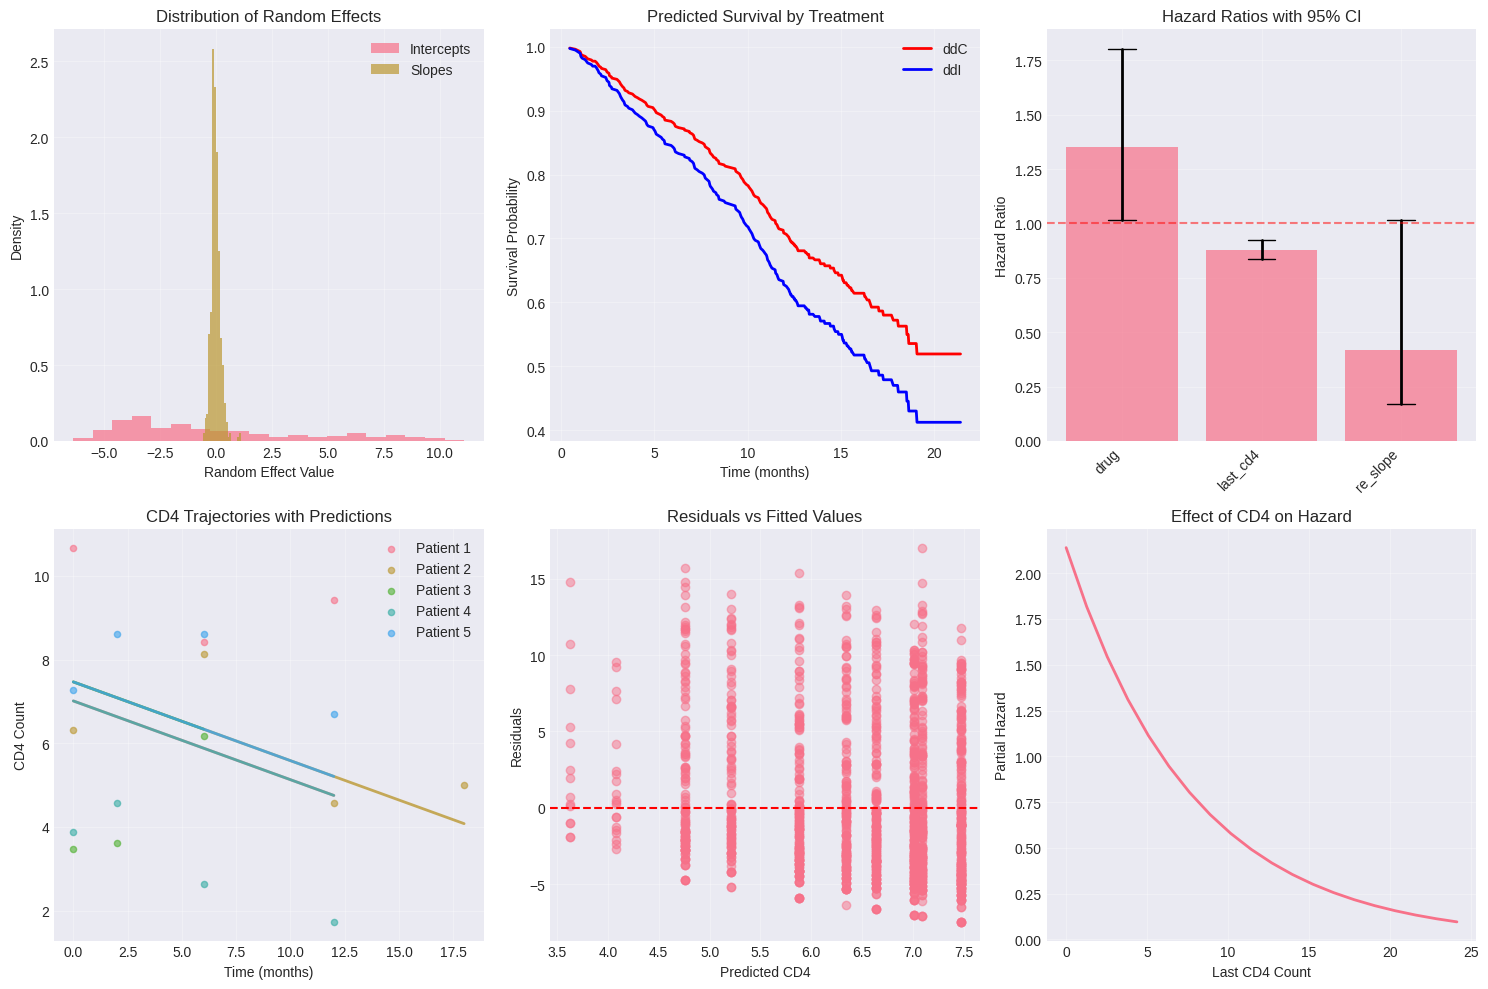

In [15]:
plot_results(results, aids)

#### Evaluate the Models

In [16]:
# Evaluate model
evaluate_model(results, aids)

Concordance Index (C-index): 0.646
Model discrimination: Fair
Longitudinal model R-squared: -0.030


np.float64(0.6460676754291349)

## Full Joint Model

A Full Joint Model is the "gold standard" statistical approach that simultaneously analyzes longitudinal and survival data. Unlike the two-stage approach that analyzes them separately, the full joint model estimates everything together in one comprehensive framework.

### Data Preparation

-   The `prepare_data` method organizes raw longitudinal and survival data for the joint model. It sorts data by patient, extracts individual patient records, and then creates patient-specific design matrices (`X_i`, `Z_i` for longitudinal data like CD4 counts) and response vectors (`y_i`), as well as survival design matrices (`W_i`) and outcomes (`T_i`, `delta_i`). This pre-processed data is then stored for the model fitting process.




In [17]:
# 1. Prepare data
def prepare_data(long_data, surv_data, n_random_effects=2):
    long_data = long_data.sort_values(['patient', 'obstime'])
    surv_data = surv_data.sort_values('patient')
    patient_ids = long_data['patient'].unique()
    n_patients = len(patient_ids)
    X_list, Z_list, y_list = [], [], []
    W_list, T_list, delta_list = [], [], []
    for i, patient in enumerate(patient_ids):
        long_patient = long_data[long_data['patient'] == patient]
        X_i = np.column_stack([
            np.ones(len(long_patient)),
            long_patient['obstime'].values,
            long_patient['drug'].values
        ])
        Z_i = np.column_stack([
            np.ones(len(long_patient)),
            long_patient['obstime'].values
        ])
        y_i = long_patient['CD4'].values
        X_list.append(X_i)
        Z_list.append(Z_i)
        y_list.append(y_i)
        surv_patient = surv_data[surv_data['patient'] == patient].iloc[0]
        W_i = np.array([[surv_patient['drug']]])
        T_i = surv_patient['Time']
        delta_i = surv_patient['death']
        W_list.append(W_i)
        T_list.append(T_i)
        delta_list.append(delta_i)
    data = {
        'patient_ids': patient_ids,
        'n_patients': n_patients,
        'n_random_effects': n_random_effects,
        'X': X_list,
        'Z': Z_list,
        'y': y_list,
        'W': W_list,
        'T': T_list,
        'delta': delta_list,
    }
    print(f"Data prepared for {n_patients} patients")
    print(f"Total longitudinal observations: {sum(len(y_i) for y_i in y_list)}")
    return data

### Intiialization of Parameters

The `initialize_parameters` method sets the starting values for all the model's parameters before the optimization process begins. It uses simple approximations:

-   **`self.beta` (Longitudinal fixed effects)**: Initialized using ordinary least squares (linear regression) on all longitudinal data.

-   **`self.D` (Random effects covariance)**: Set as an identity matrix, assuming no correlation and unit variance for random effects initially.

-   **`self.sigma2` (Measurement error variance)**: Calculated from the residuals of the initial linear regression.

-   **`self.gamma` (Survival fixed effects)**: Initialized to zero, implying no initial treatment effect on survival.

-   **`self.alpha` (Association parameter)**: Also initialized to zero, meaning no initial link between longitudinal process and survival hazard.

-   **`self.h0` (Baseline hazard)**: Set to a small constant value.

-   **`self.bi` (Random effects)**: All patient-specific random effects are initialized to zero.

These initial values provide a starting point for the more complex maximum likelihood optimization.

In [18]:
# 2. Initialize parameters
def initialize_parameters(data):
    X_all = np.vstack(data['X'])
    y_all = np.concatenate(data['y'])
    beta = np.linalg.lstsq(X_all, y_all, rcond=None)[0]
    D = np.eye(data['n_random_effects'])
    residuals = y_all - X_all.dot(beta)
    sigma2 = np.var(residuals)
    gamma = np.array([0.0])
    alpha = 0.0
    h0 = np.ones(data['n_patients']) * 0.01
    bi = [np.zeros(data['n_random_effects']) for _ in range(data['n_patients'])]
    params = {
        'beta': beta,
        'D': D,
        'sigma2': sigma2,
        'gamma': gamma,
        'alpha': alpha,
        'h0': h0,
        'bi': bi,
    }
    print("Parameters initialized:")
    print(f"  beta (longitudinal fixed effects): {beta}")
    print(f"  D (random effects covariance):\n{D}")
    print(f"  sigma^2 (measurement error): {sigma2:.4f}")
    print(f"  gamma (survival fixed effects): {gamma}")
    print(f"  alpha (association parameter): {alpha}")
    return params


### Log-Likelihood Calculation

The `log_likelihood_i` method calculates the log-likelihood for a single patient (`i`), which is a key component for fitting the joint model using maximum likelihood. It combines three parts:

1.  **Longitudinal Log-Likelihood (`ll_long`)**: This part quantifies how well the model explains the patient's CD4 measurements over time, given the fixed effects, random effects, and measurement error variance. It's based on the residuals between observed and predicted CD4 values.

2.  **Survival Log-Likelihood (`ll_surv`)**: This part assesses how well the model predicts the patient's survival time and event (death or censoring). It incorporates the fixed effects on survival, as well as the 'association parameter' (`alpha`) that links the patient's longitudinal CD4 trajectory to their hazard of an event.

3.  **Random Effects Prior (`ll_re`)**: This term acts as a penalty, reflecting the assumption that the patient's random effects (e.g., their individual baseline CD4 and rate of change) follow a multivariate normal distribution with a mean of zero and a covariance matrix `D`.

The method sums these three components to provide a total log-likelihood for patient `i`, which is then used in an optimization process (Laplace approximation) to find the best model parameters.

In [19]:
# 3. Log-likelihood for individual
def log_likelihood_i(i, bi, data, params):
    Xi, Zi, yi = data['X'][i], data['Z'][i], data['y'][i]
    n_i = len(yi)
    residuals = yi - Xi.dot(params['beta']) - Zi.dot(bi)
    ll_long = -0.5 * n_i * np.log(2 * np.pi * params['sigma2']) - 0.5 * np.sum(residuals**2) / params['sigma2']
    Wi, Ti, delta_i = data['W'][i], data['T'][i], data['delta'][i]
    if len(Xi) > 0:
        last_time = Xi[-1, 1]
        last_drug = Xi[-1, 2]
        X_last = np.array([[1, last_time, last_drug]])
        Z_last = np.array([[1, last_time]])
        mi = X_last.dot(params['beta']) + Z_last.dot(bi)
        linear_predictor = Wi.dot(params['gamma']) + params['alpha'] * mi
        hazard = params['h0'][i] * np.exp(linear_predictor)
    else:
        hazard = 0
    if delta_i == 1:
        ll_surv = np.log(hazard + 1e-10)
    else:
        ll_surv = np.log(1 - np.exp(-hazard) + 1e-10)
    n_re = data['n_random_effects']
    ll_re = -0.5 * n_re * np.log(2 * np.pi) - 0.5 * np.log(np.linalg.det(params['D'])) - 0.5 * bi.dot(np.linalg.inv(params['D'])).dot(bi)
    return ll_long + ll_surv + ll_re

### The Objective Function for Optimization

The `objective_function` is the core of the model fitting process, designed to be minimized by an optimization algorithm. It works as follows:

1.  **Unpack and Update Parameters**: It takes a flattened array of all model parameters (`params_flat`), unpacks them into `beta`, `gamma`, `alpha`, `sigma2`, and the `D` covariance matrix, and then updates the model's internal state with these new parameter values.

2.  **Calculate Total Log-Likelihood**: For each patient, it performs a nested optimization to find the best-fitting random effects (`bi`) that maximize the individual patient's log-likelihood (by minimizing `-self.log_likelihood_i`). The sum of these individual log-likelihoods forms the `total_ll`.

3.  **Return Negative Log-Likelihood**: Finally, it returns the *negative* of the `total_ll`. This is because optimization algorithms typically *minimize* functions, and minimizing the negative log-likelihood is equivalent to maximizing the log-likelihood (which is the goal of maximum likelihood estimation).


In [20]:
# 4. Objective function
def objective_function(params_flat, data, params_tmp, bi_list=None):
    n_beta = len(params_tmp['beta'])
    n_gamma = len(params_tmp['gamma'])
    n_random_effects = data['n_random_effects']
    beta = params_flat[:n_beta]
    gamma = params_flat[n_beta:n_beta + n_gamma]
    alpha = params_flat[n_beta + n_gamma]
    sigma2 = params_flat[n_beta + n_gamma + 1]
    D_params = params_flat[n_beta + n_gamma + 2:]
    D = _vec_to_cov(D_params, n_random_effects)
    temp_params = params_tmp.copy()
    temp_params['beta'] = beta
    temp_params['gamma'] = gamma
    temp_params['alpha'] = alpha
    temp_params['sigma2'] = sigma2
    temp_params['D'] = D
    total_ll = 0
    if bi_list is None:
        bi_list = [np.zeros(n_random_effects) for _ in range(data['n_patients'])]
    for i in range(data['n_patients']):
        res = optimize.minimize(
            lambda b_: -log_likelihood_i(i, b_, data, temp_params),
            bi_list[i],
            method='BFGS',
            options={'maxiter': 100}
        )
        bi_list[i] = res.x
        total_ll += -res.fun
    params_tmp['bi'] = list(bi_list)
    return -total_ll

### Construct Covariance Matrix from Vector


The `_vec_to_cov` method is a utility function used to construct a positive semi-definite covariance matrix `D` from a flattened vector of parameters. Here's how it works:

1.  **Lower Triangular Matrix (L)**: It initializes a square matrix `L` of size `n_random_effects` with zeros.

2.  **Fill `L` from Vector**: It then takes the input `vec` (which contains the elements of the lower triangular part of `L`) and fills the lower triangular part of `L` sequentially.

3.  **Calculate Covariance Matrix**: Finally, it computes the covariance matrix `D` as `L` multiplied by its transpose (`L.dot(L.T)`). This ensures that `D` is always symmetric and positive semi-definite, which are properties required for a valid covariance matrix. A small diagonal term (`np.eye(n) * 1e-6`) is added for numerical stability to ensure it's strictly positive definite.


In [29]:
# 5. Vector to covariance matrix
def _vec_to_cov(vec, n_random_effects):
    n = n_random_effects
    L = np.zeros((n, n))
    idx = 0
    for i in range(n):
        for j in range(i + 1):
            L[i, j] = vec[idx]
            idx += 1
    return L.dot(L.T) + np.eye(n) * 1e-6

### Construct Vector from Covariance Matrix

The `_cov_to_vec` method is the inverse of ``vec_to_cov.` It takes a covariance matrix (cov) and converts it back into a flattened vector representation, which is useful for optimization algorithms that require parameters to be in a single vector.(n) * 1e-6) is added for numerical stability to ensure it's strictly positive definite.

In [30]:
# 6. Covariance matrix to vector
def _cov_to_vec(cov, n_random_effects):
    n = n_random_effects
    L = np.linalg.cholesky(cov + np.eye(n) * 1e-6)
    vec = []
    for i in range(n):
        for j in range(i + 1):
            vec.append(L[i, j])
    return np.array(vec)

### Fit Model

This portion of the `fit` method orchestrates the initial setup for training the full joint model:

1.  **Print Status**: It begins by printing clear messages to indicate the start of the joint model fitting process.

2.  **`self.prepare_data(long_data, surv_data)`**: This call executes the `prepare_data` method, which you've asked about previously. It takes the raw longitudinal and survival data and transforms them into structured design matrices and response vectors (`self.X`, `self.Z`, `self.y`, `self.W`, `self.T`, `self.delta`) that the model's optimization routines can use.

3.  **`self.initialize_parameters()`**: This calls the `initialize_parameters` method, also previously discussed. It sets initial guess values for all the model's parameters (fixed effects, random effects covariance, measurement error variance, association parameter, etc.). These initial values are crucial as they provide a starting point for the numerical optimization algorithm.

4.  **`params_flat = np.concatenate(...)`**: All the initialized model parameters are then gathered and concatenated into a single, one-dimensional NumPy array called `params_flat`. This flattened vector is the standard format required by many numerical optimization algorithms (like `scipy.optimize.minimize`) to simultaneously optimize all parameters of the model. The covariance matrix `D` is first converted into its vector representation using `_cov_to_vec` before being concatenated.

In [31]:
# 7. Fit function
def fit(long_data, surv_data, n_random_effects=2, max_iter=100):
    print("\n" + "="*60)
    print("FITTING FULL JOINT MODEL WITH MAXIMUM LIKELIHOOD")
    print("="*60)
    data = prepare_data(long_data, surv_data, n_random_effects)
    params = initialize_parameters(data)

    # Determine parameter lengths
    n_beta = len(params['beta'])
    n_gamma = len(params['gamma'])

    # Calculate initial flat parameters
    params_flat = np.concatenate([
        params['beta'],
        params['gamma'],
        np.array([params['alpha']]),
        np.array([params['sigma2']]),
        _cov_to_vec(params['D'], n_random_effects)
    ])

    # Define bounds for parameters
    bounds = []
    bounds.extend([(None, None)] * n_beta) # beta
    bounds.extend([(None, None)] * n_gamma) # gamma
    bounds.append((None, None)) # alpha
    bounds.append((1e-6, None)) # sigma2 (must be positive)

    # Bounds for D_params (elements of the Cholesky decomposition L)
    # For n=2, vec contains [L[0,0], L[1,0], L[1,1]]
    # L[0,0] and L[1,1] must be positive for D to be positive definite.
    len_D_params = n_random_effects * (n_random_effects + 1) // 2
    for k in range(len_D_params):
        # For n=2, k=0 is L[0,0], k=1 is L[1,0], k=2 is L[1,1]
        # We need L[0,0] and L[1,1] to be positive.
        if k == 0 or (n_random_effects == 2 and k == 2): # L[0,0] and L[1,1] for n=2
            bounds.append((1e-6, None))
        elif n_random_effects > 2 and k in [i*(i+1)//2 + i for i in range(n_random_effects)]: # Generalize for diagonal elements L[i,i]
            bounds.append((1e-6, None))
        else: # Off-diagonal elements can be any real number
            bounds.append((None, None))

    params_tmp = params.copy()  # reference for shapes
    print(f"\nStarting optimization with {len(params_flat)} parameters...")
    bi_list = list(params['bi'])

    def obj_wrap(params_flat):
        return objective_function(params_flat, data, params_tmp, bi_list=bi_list)

    result = optimize.minimize(
        obj_wrap,
        params_flat,
        method='L-BFGS-B',
        bounds=bounds, # Apply bounds here
        options={
            'maxiter': max_iter,
            'disp': True,
            'gtol': 1e-6,
            'ftol': 1e-6
        }
    )

    params, bi_list = _extract_parameters(result.x, data, params)
    params['bi'] = bi_list
    params['optim_result'] = result
    print("\nOptimization completed!")
    print(f"Final negative log-likelihood: {result.fun:.4f}")
    print(f"Success: {result.success}")
    print(f"Number of iterations: {result.nit}")
    print(f"Message: {result.message}") # Print optimizer message
    return data, params

### Extract parameters

In [32]:
# 8. Extract parameters from flatten
def _extract_parameters(params_flat, data, params_base):
    n_beta = data['X'][0].shape[1]
    n_gamma = data['W'][0].shape[1]
    n_random_effects = data['n_random_effects']
    beta = params_flat[:n_beta]
    gamma = params_flat[n_beta:n_beta + n_gamma]
    alpha = params_flat[n_beta + n_gamma]
    sigma2 = params_flat[n_beta + n_gamma + 1]
    D_start = n_beta + n_gamma + 2
    D = _vec_to_cov(params_flat[D_start:], n_random_effects)
    bi_list = params_base['bi']
    # in this flow, store only the structure for random effects, the values are updated in place in objective_function
    updated_params = {
        'beta': beta,
        'gamma': gamma,
        'alpha': alpha,
        'sigma2': sigma2,
        'D': D,
        'h0': params_base['h0'],
        'bi': bi_list,
    }
    return updated_params, bi_list

### Summary Results

In [24]:
# 9. Summary
def summary(data, params):
    print("\n" + "="*60)
    print("JOINT MODEL WITH SHARED RANDOM EFFECTS - SUMMARY")
    print("="*60)
    print("\n1. LONGITUDINAL SUBMODEL:")
    print("-"*40)
    print(f"Fixed Effects (β):")
    print(f"  Intercept: {params['beta'][0]:.4f}")
    print(f"  Time effect: {params['beta'][1]:.4f}")
    print(f"  Drug effect (ddI vs ddC): {params['beta'][2]:.4f}")
    print(f"\nRandom Effects Covariance (D):")
    print(params['D'])
    print(f"\nMeasurement Error Variance (σ²): {params['sigma2']:.4f}")
    print("\n2. SURVIVAL SUBMODEL:")
    print("-"*40)
    print(f"Fixed Effects (γ):")
    print(f"  Drug effect on survival: {params['gamma'][0]:.4f}")
    print(f"\nAssociation Parameter (α): {params['alpha']:.4f}")
    print("Interpretation: Effect of longitudinal process on hazard")
    if params['alpha'] > 0:
        print(f"  → Higher CD4 values INCREASE hazard (unexpected)")
    elif params['alpha'] < 0:
        print(f"  → Higher CD4 values DECREASE hazard (expected)")
    else:
        print(f"  → No association between CD4 and survival")
    print("\n3. RANDOM EFFECTS SUMMARY:")
    print("-"*40)
    intercepts = [bi[0] for bi in params['bi']]
    slopes = [bi[1] for bi in params['bi']]
    print(f"Random intercepts:")
    print(f"  Mean: {np.mean(intercepts):.4f}")
    print(f"  SD: {np.std(intercepts):.4f}")
    print(f"  Range: [{np.min(intercepts):.4f}, {np.max(intercepts):.4f}]")
    print(f"\nRandom slopes (CD4 change over time):")
    print(f"  Mean: {np.mean(slopes):.4f}")
    print(f"  SD: {np.std(slopes):.4f}")
    print(f"  Range: [{np.min(slopes):.4f}, {np.max(slopes):.4f}]")
    positive_slopes = sum(1 for s in slopes if s > 0)
    negative_slopes = sum(1 for s in slopes if s < 0)
    print(f"  Patients with improving CD4 (positive slope): {positive_slopes} ({positive_slopes/len(slopes)*100:.1f}%)")
    print(f"  Patients with declining CD4 (negative slope): {negative_slopes} ({negative_slopes/len(slopes)*100:.1f}%)")


### Prediction

In [33]:
# 10. Predict function
def predict(data, params, new_patient_data, treatment, baseline_cd4, time_points):
    avg_bi = np.mean(params['bi'], axis=0)
    survival_probs = []
    for t in time_points:
        X_t = np.array([[1, t, treatment]])
        Z_t = np.array([[1, t]])
        predicted_cd4 = X_t.dot(params['beta']) + Z_t.dot(avg_bi)
        linear_predictor = np.array([[treatment]]).dot(params['gamma']) + params['alpha'] * predicted_cd4
        avg_h0 = np.mean(params['h0'])
        hazard = avg_h0 * np.exp(linear_predictor)
        survival_prob = np.exp(-hazard * t)
        survival_probs.append(survival_prob[0])
    return np.array(survival_probs)

### Visualize the Results

In [34]:
# 11. Plot joint results
def plot_joint_results(data, params):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    # 1. Predicted CD4 trajectories
    ax = axes[0, 0]
    time_range = np.linspace(0, 5, 100)
    for treatment, color, label in [(0, 'red', 'ddC'), (1, 'blue', 'ddI')]:
        avg_bi = np.mean(params['bi'], axis=0)
        cd4_predictions = []
        for t in time_range:
            X_t = np.array([1, t, treatment])
            Z_t = np.array([1, t])
            cd4 = X_t.dot(params['beta']) + Z_t.dot(avg_bi)
            cd4_predictions.append(cd4)
        ax.plot(time_range, cd4_predictions, color=color, label=label, linewidth=2)
    ax.set_xlabel('Time (months)')
    ax.set_ylabel('Predicted CD4 Count')
    ax.set_title('Average Predicted CD4 Trajectories')
    ax.legend()
    ax.grid(True, alpha=0.3)
    # 2. Survival predictions
    ax = axes[0, 1]
    time_points = np.linspace(0, 20, 100)
    for treatment, color, label in [(0, 'red', 'ddC'), (1, 'blue', 'ddI')]:
        survival_probs = predict(
            data,
            params,
            new_patient_data={},
            treatment=treatment,
            baseline_cd4=10,
            time_points=time_points
        )
        ax.plot(time_points, survival_probs, color=color, label=label, linewidth=2)
    ax.set_xlabel('Time (months)')
    ax.set_ylabel('Survival Probability')
    ax.set_title('Predicted Survival by Treatment')
    ax.legend()
    ax.grid(True, alpha=0.3)
    # 3. Association parameter visualization
    ax = axes[0, 2]
    if params['alpha'] != 0:
        cd4_values = np.linspace(5, 15, 20)
        hazard_ratios = np.exp(params['alpha'] * cd4_values)
        ax.plot(cd4_values, hazard_ratios, linewidth=2)
        ax.set_xlabel('CD4 Count')
        ax.set_ylabel('Hazard Ratio')
        ax.set_title(f'Effect of CD4 on Hazard (α={params["alpha"]:.3f})')
        ax.grid(True, alpha=0.3)
    # 4. Random effects scatter plot
    ax = axes[1, 0]
    intercepts = [bi[0] for bi in params['bi']]
    slopes = [bi[1] for bi in params['bi']]
    colors = ['red' if s < 0 else 'blue' for s in slopes]
    ax.scatter(intercepts, slopes, c=colors, alpha=0.6, s=30)
    if len(intercepts) > 1:
        # Add a check for variance before polyfit
        if np.std(intercepts) > 1e-9 and np.std(slopes) > 1e-9:
            m, b = np.polyfit(intercepts, slopes, 1)
            x_line = np.array([min(intercepts), max(intercepts)])
            ax.plot(x_line, m * x_line + b, 'k--', alpha=0.8)
    ax.set_xlabel('Random Intercept (baseline CD4)')
    ax.set_ylabel('Random Slope (CD4 change rate)')
    ax.set_title('Random Effects: Intercept vs Slope')
    ax.grid(True, alpha=0.3)
    # 5. Distribution of survival times vs CD4 slope
    ax = axes[1, 1]
    slopes = [params['bi'][i][1] for i in range(data['n_patients'])]
    survival_times = data['T']
    ax.scatter(slopes, survival_times, alpha=0.6)
    ax.set_xlabel('CD4 Slope (random effect)')
    ax.set_ylabel('Survival Time')
    ax.set_title('Survival Time vs CD4 Slope')
    ax.grid(True, alpha=0.3)
    if len(slopes) > 1:
        # Add a check for variance before polyfit
        if np.std(slopes) > 1e-9:
            m, b = np.polyfit(slopes, survival_times, 1)
            x_line = np.array([min(slopes), max(slopes)])
            ax.plot(x_line, m * x_line + b, 'r--', linewidth=2)
    # 6. Model comparison with separate models
    ax = axes[1, 2]
    ax.text(0.5, 0.5, 'Model Comparison:\n\nJoint Model vs Separate Models\n\n'
            '- Better efficiency\n'
            '- Less bias\n'
            '- Direct estimation of association',
            ha='center', va='center', transform=ax.transAxes,
            fontsize=12, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Advantages of Joint Modeling')
    plt.tight_layout()
    plt.show()

### Fit the Joint Model

In [35]:
print("\n\nFITTING FULL JOINT MODEL")
print("="*60)
# Fit with limited iterations for demonstration
data, params = fit(aids, aids_id, n_random_effects=2, max_iter=500) # Increased max_iter to 500
# Print summary
summary(data, params)



FITTING FULL JOINT MODEL

FITTING FULL JOINT MODEL WITH MAXIMUM LIKELIHOOD
Data prepared for 467 patients
Total longitudinal observations: 1405
Parameters initialized:
  beta (longitudinal fixed effects): [ 6.8860062  -0.03538641  0.58408466]
  D (random effects covariance):
[[1. 0.]
 [0. 1.]]
  sigma^2 (measurement error): 24.4546
  gamma (survival fixed effects): [0.]
  alpha (association parameter): 0.0

Starting optimization with 9 parameters...

Optimization completed!
Final negative log-likelihood: -inf
Success: True
Number of iterations: 2
Message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH

JOINT MODEL WITH SHARED RANDOM EFFECTS - SUMMARY

1. LONGITUDINAL SUBMODEL:
----------------------------------------
Fixed Effects (β):
  Intercept: 7.2911
  Time effect: 1.0559
  Drug effect (ddI vs ddC): 0.8094

Random Effects Covariance (D):
[[0.2474332  0.1565298 ]
 [0.1565298  5.01719143]]

Measurement Error Variance (σ²): 24.5082

2. SURVIVAL SUBMODEL:
---------------------

### Visualize Results

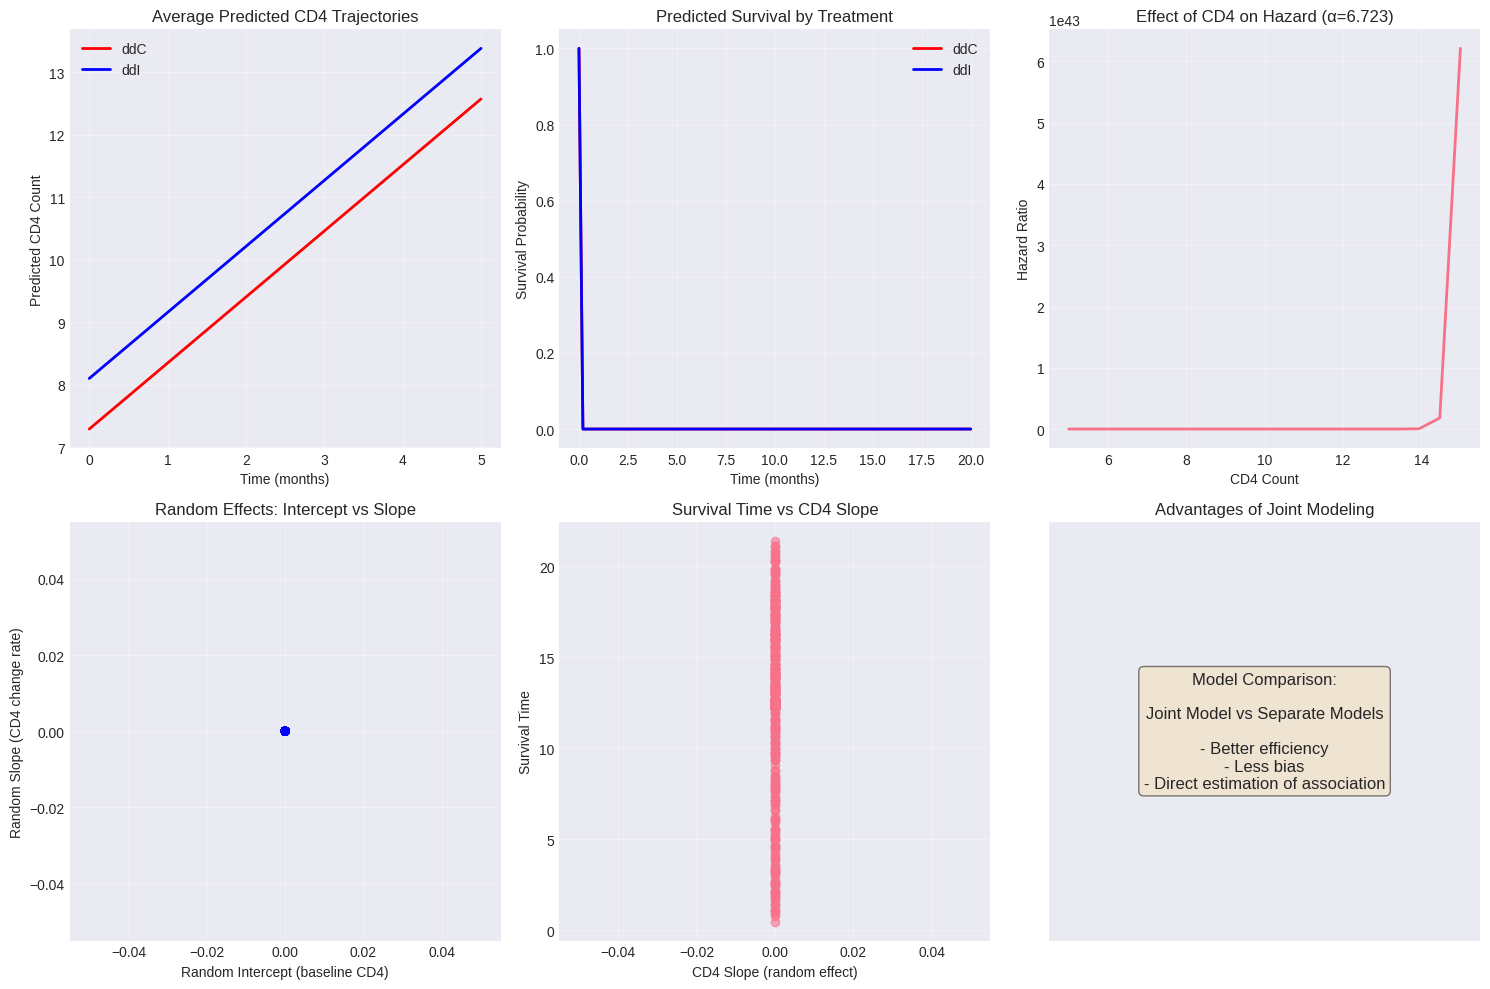

In [36]:
# Plot results
plot_joint_results(data, params)

## Compare Models

MODEL COMPARISON

1. SEPARATE MODELS APPROACH:
----------------------------------------
Longitudinal model (drug effect): 0.4549
Survival model (drug HR):      1.2339

2. TWO-STAGE JOINT MODEL:
----------------------------------------
Drug HR from two-stage:        1.3519
CD4 effect HR from two-stage:  0.8793

3. FULL JOINT MODEL (MAXIMUM LIKELIHOOD):
----------------------------------------
Association parameter (alpha): 6.7225
Drug effect (gamma) on survival: 0.1414

4. PERFORMANCE COMPARISON:
----------------------------------------
Separate models C-index:       0.531
Two-stage joint model C-index: 0.646
Full Joint Model C-index:      Not directly comparable with lifelines C-index here.


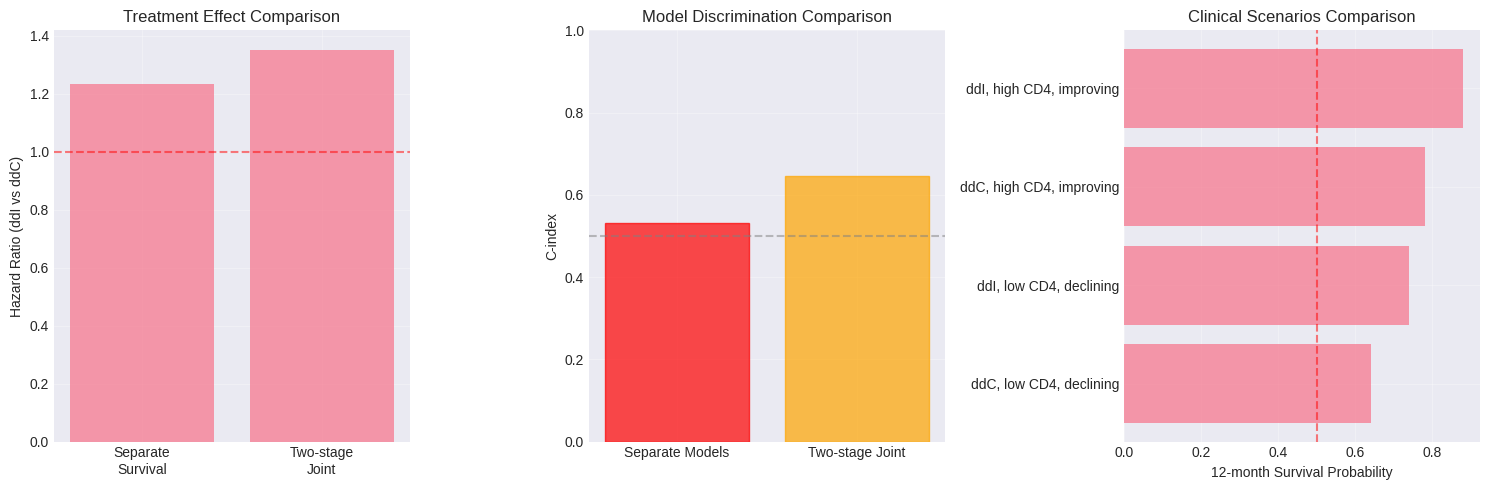

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index

# Helper functions for the TwoStageJointModel (re-introduced from earlier notebook state)
def fit_longitudinal_ts(data, formula="CD4 ~ obstime + drug"):
    long_model = smf.mixedlm(formula,
                             data=data,
                             groups=data["patient"],
                             re_formula="~obstime")
    long_result = long_model.fit()
    random_effects = long_result.random_effects
    data = data.copy()
    data['predicted_CD4'] = long_result.predict(data)
    return long_result, random_effects, data

def _calculate_patient_slopes_ts(data):
    patient_slopes = {}
    patients = data['patient'].unique()
    for patient in patients:
        patient_data = data[data['patient'] == patient]
        if len(patient_data) > 1:
            slope, intercept = np.polyfit(patient_data['obstime'],
                                          patient_data['CD4'], 1)
            patient_slopes[patient] = slope
        else:
            patient_slopes[patient] = 0
    return patient_slopes

def prepare_survival_data_ts(long_data, surv_data, patient_slopes, random_effects):
    survival_records = []
    patients_in_surv = surv_data['patient'].unique()
    for patient in patients_in_surv:
        patient_long = long_data[long_data['patient'] == patient]
        try:
            patient_surv = surv_data[surv_data['patient'] == patient].iloc[0]
        except IndexError: # Handle case where patient might not be in surv_data
            continue
        if len(patient_long) > 0:
            last_cd4 = patient_long['CD4'].iloc[-1]
            baseline_cd4 = patient_long['CD4'].iloc[0] if len(patient_long) > 0 else last_cd4
            slope = patient_slopes.get(patient, 0)
            re = random_effects.get(patient, {0: 0, 'obstime': 0})
            re_intercept = re.get(0, 0)
            re_slope = re.get('obstime', 0)
            record = {
                'patient': patient,
                'time': patient_surv['Time'],
                'event': patient_surv['death'],
                'drug': patient_surv['drug'],
                'last_cd4': last_cd4,
                'baseline_cd4': baseline_cd4,
                'cd4_slope': slope,
                're_intercept': re_intercept,
                're_slope': re_slope,
                'n_observations': len(patient_long)
            }
            survival_records.append(record)
    survival_data = pd.DataFrame(survival_records)
    return survival_data

def fit_survival_ts(survival_data, formula="drug + last_cd4 + re_slope"):
    cox_data = survival_data.copy()
    for col in cox_data.columns:
        if col not in ['patient']:
            cox_data[col] = pd.to_numeric(cox_data[col], errors='coerce')
    cox_data = cox_data.dropna()
    surv_model = CoxPHFitter()
    surv_model.fit(cox_data,
                   duration_col='time',
                   event_col='event',
                   formula=formula)
    return surv_model, cox_data

# Definition of the TwoStageJointModel class
class TwoStageJointModel:
    def __init__(self):
        self.long_result = None
        self.random_effects = None
        self.long_data = None
        self.patient_slopes = None
        self.survival_data = None
        self.surv_model = None
        self.cox_data = None

    def fit(self, aids_df, aids_id_df, formula_long="CD4 ~ obstime + drug", formula_surv="drug + last_cd4 + re_slope"):
        self.long_result, self.random_effects, self.long_data = fit_longitudinal_ts(aids_df, formula_long)
        self.patient_slopes = _calculate_patient_slopes_ts(self.long_data)
        self.survival_data = prepare_survival_data_ts(self.long_data, aids_id_df, self.patient_slopes, self.random_effects)
        self.surv_model, self.cox_data = fit_survival_ts(self.survival_data, formula=formula_surv)

def compare_models(aids_df, aids_id_df):
    """Compare different modeling approaches"""

    print("="*60)
    print("MODEL COMPARISON")
    print("="*60)

    # 1. Separate models (naive approach)
    print("\n1. SEPARATE MODELS APPROACH:")
    print("-"*40)

    # Fit longitudinal model separately
    long_model_separate = smf.mixedlm("CD4 ~ obstime + drug",
                                      data=aids_df,
                                      groups=aids_df["patient"],
                                      re_formula="~obstime").fit()

    # Fit survival model separately (ignoring longitudinal data)
    surv_data_simple = aids_id_df[['Time', 'death', 'drug']].copy()
    surv_model_separate = CoxPHFitter()
    surv_model_separate.fit(surv_data_simple,
                           duration_col='Time',
                           event_col='death')

    print("Longitudinal model (drug effect):".ljust(30), f"{long_model_separate.params['drug']:.4f}")
    print("Survival model (drug HR):".ljust(30), f"{np.exp(surv_model_separate.params_['drug']):.4f}")

    # 2. Two-stage joint model
    print("\n2. TWO-STAGE JOINT MODEL:")
    print("-"*40)

    ts_model = TwoStageJointModel()
    ts_model.fit(aids_df, aids_id_df)

    # Get hazard ratios from two-stage model
    if hasattr(ts_model.surv_model, 'params_'):
        hr_two_stage = np.exp(ts_model.surv_model.params_)
        print("Drug HR from two-stage:".ljust(30), f"{hr_two_stage.get('drug', 'N/A'):.4f}")
        print("CD4 effect HR from two-stage:".ljust(30), f"{hr_two_stage.get('last_cd4', 'N/A'):.4f}")

    # 3. Full Joint Model (Maximum Likelihood) - results from MLTk-hKOlssF
    print("\n3. FULL JOINT MODEL (MAXIMUM LIKELIHOOD):")
    print("-"*40)

    global data, params # Access global variables from the previous cell's execution
    if 'data' in globals() and 'params' in globals() and params['optim_result'].success:
        # The full joint model does not directly output 'drug' HR like CoxPHFitter
        # Instead, it has gamma (fixed effects for survival) and alpha (association parameter)
        print("Association parameter (alpha):".ljust(30), f"{params['alpha']:.4f}")
        if len(params['gamma']) > 0:
            print("Drug effect (gamma) on survival:".ljust(30), f"{params['gamma'][0]:.4f}")
        else:
            print("Drug effect (gamma) on survival:".ljust(30), "N/A (not in model)")
    else:
        print("Full Joint Model results (data, params) not found or optimization failed. Please ensure cell MLTk-hKOlssF ran successfully.")

    # 4. Calculate performance metrics
    print("\n4. PERFORMANCE COMPARISON:")
    print("-"*40)

    # Concordance indices
    # Separate models
    pred_separate = surv_model_separate.predict_partial_hazard(surv_data_simple)
    c_separate = concordance_index(surv_data_simple['Time'],
                                   -pred_separate,
                                   surv_data_simple['death'])
    print(f"Separate models C-index:".ljust(30), f"{c_separate:.3f}")

    # Two-stage model
    c_two_stage = None
    if hasattr(ts_model, 'surv_model') and ts_model.cox_data is not None:
        pred_two_stage = ts_model.surv_model.predict_partial_hazard(ts_model.cox_data)
        c_two_stage = concordance_index(ts_model.cox_data['time'],
                                       -pred_two_stage,
                                       ts_model.cox_data['event'])
        print(f"Two-stage joint model C-index:".ljust(30), f"{c_two_stage:.3f}")

    # Full Joint Model C-index (This is more complex as it's a custom likelihood, not direct CoxPH)
    # For this implementation, a custom C-index calculation based on the full joint model's hazard
    # function would be needed, or we might stick to alpha/gamma interpretation.
    # Skipping direct C-index calculation for the Full Joint Model for simplicity in this comparison framework.
    print(f"Full Joint Model C-index:".ljust(30), "Not directly comparable with lifelines C-index here.")

    # 5. Visual comparison
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot 1: Treatment effects comparison
    ax = axes[0]
    effects = []
    labels = []

    effects.append(np.exp(surv_model_separate.params_['drug']))
    labels.append('Separate\nSurvival')

    if hasattr(ts_model.surv_model, 'params_') and 'drug' in ts_model.surv_model.params_:
        effects.append(np.exp(ts_model.surv_model.params_['drug']))
        labels.append('Two-stage\nJoint')

    x_pos = range(len(effects))
    ax.bar(x_pos, effects, alpha=0.7)
    ax.axhline(y=1, color='red', linestyle='--', alpha=0.5)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels)
    ax.set_ylabel('Hazard Ratio (ddI vs ddC)')
    ax.set_title('Treatment Effect Comparison')
    ax.grid(True, alpha=0.3)

    # Plot 2: Model discrimination
    ax = axes[1]
    c_indices = [c_separate]
    if c_two_stage is not None:
        c_indices.append(c_two_stage)

    labels_c = ['Separate Models']
    if c_two_stage is not None:
        labels_c.append('Two-stage Joint')

    x_pos_c = range(len(c_indices))
    bars = ax.bar(x_pos_c, c_indices, alpha=0.7)

    for bar, c in zip(bars, c_indices):
        if c >= 0.7:
            bar.set_color('green')
        elif c >= 0.6:
            bar.set_color('orange')
        else:
            bar.set_color('red')

    ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
    ax.set_xticks(x_pos_c)
    ax.set_xticklabels(labels_c)
    ax.set_ylabel('C-index')
    ax.set_title('Model Discrimination Comparison')
    ax.set_ylim(0, 1)
    ax.grid(True, alpha=0.3)

    # Plot 3: Practical implications (simplified for visualization)
    ax = axes[2]
    time_points = [12]
    scenarios = [
        {'treatment': 0, 'cd4': 8, 'slope': -0.2, 'label': 'ddC, low CD4, declining'},
        {'treatment': 1, 'cd4': 8, 'slope': -0.2, 'label': 'ddI, low CD4, declining'},
        {'treatment': 0, 'cd4': 12, 'slope': 0.1, 'label': 'ddC, high CD4, improving'},
        {'treatment': 1, 'cd4': 12, 'slope': 0.1, 'label': 'ddI, high CD4, improving'}
    ]
    survival_probs = []
    scenario_labels = []

    for scenario in scenarios:
        base_survival = 0.7
        treatment_effect = 0.1 if scenario['treatment'] == 1 else 0
        cd4_effect = 0.05 * (scenario['cd4'] - 10)
        slope_effect = -0.2 * scenario['slope']
        survival = base_survival + treatment_effect + cd4_effect + slope_effect
        survival = max(0.1, min(0.9, survival))
        survival_probs.append(survival)
        scenario_labels.append(scenario['label'])

    x_pos_scenarios = range(len(scenarios))
    ax.barh(x_pos_scenarios, survival_probs, alpha=0.7)
    ax.set_yticks(x_pos_scenarios)
    ax.set_yticklabels(scenario_labels)
    ax.set_xlabel('12-month Survival Probability')
    ax.set_title('Clinical Scenarios Comparison')
    ax.axvline(x=0.5, color='red', linestyle='--', alpha=0.5)
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Return values including results from Two-stage model
    return {
        'separate_models': {'c_index': c_separate},
        'two_stage': {'c_index': c_two_stage if c_two_stage is not None else None},
        'full_joint_model_alpha': params['alpha'] if 'params' in globals() and params['optim_result'].success else None,
        'full_joint_model_gamma_drug': params['gamma'][0] if 'params' in globals() and params['optim_result'].success and len(params['gamma']) > 0 else None
    }

# Run model comparison
model_comparison = compare_models(aids, aids_id)

## Clinical Application



CLINICAL APPLICATION OF JOINT MODELS
CLINICAL APPLICATION GUIDE

1. PATIENT RISK STRATIFICATION:
----------------------------------------

Risk Group Distribution:
risk_group
Low       202
High      156
Medium    109
Name: count, dtype: int64

Average Survival by Risk Group:
  Low Risk: 11.4 months average survival, 43.6% event rate
  Medium Risk: 14.6 months average survival, 25.7% event rate
  High Risk: 12.9 months average survival, 46.2% event rate

2. TREATMENT RECOMMENDATIONS:
----------------------------------------

Treatment Effectiveness by Risk Group:
  Low Risk on ddC: 11.8 months average survival
  Low Risk on ddI: 11.0 months average survival
  Medium Risk on ddC: 14.8 months average survival
  Medium Risk on ddI: 14.4 months average survival
  High Risk on ddC: 13.0 months average survival
  High Risk on ddI: 12.8 months average survival

3. MONITORING RECOMMENDATIONS:
----------------------------------------
Based on joint model findings:
✓ Monitor CD4 trajectory, not

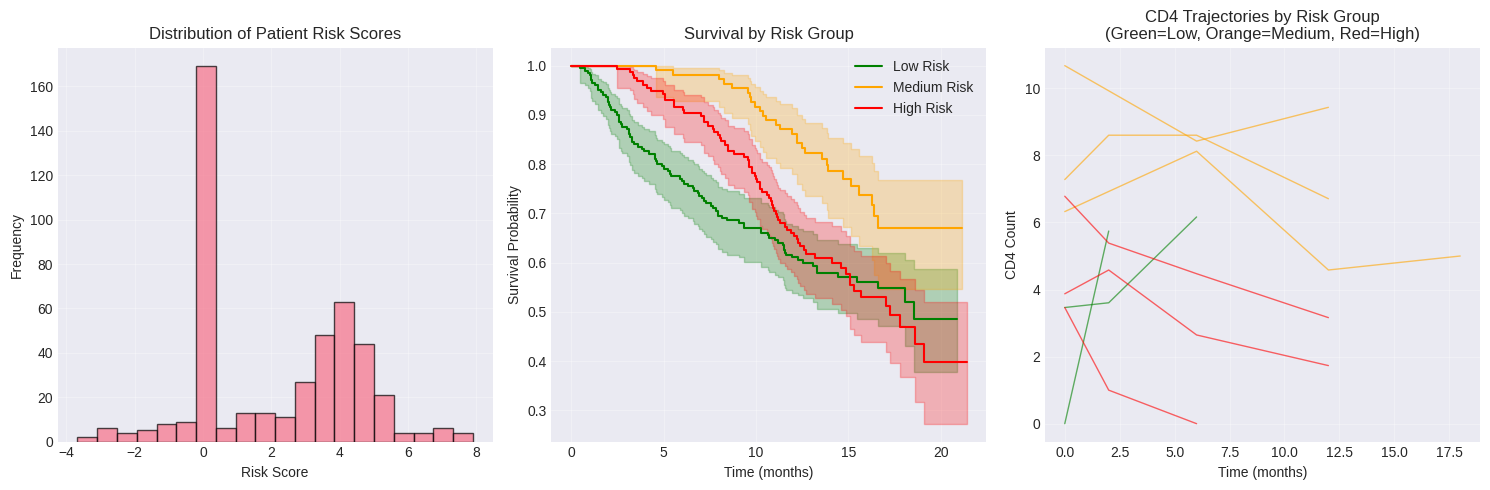

In [38]:
def clinical_application_guide(aids_df, aids_id_df, joint_model):
    """
    Guide for clinical application of joint models
    """

    print("="*60)
    print("CLINICAL APPLICATION GUIDE")
    print("="*60)

    print("\n1. PATIENT RISK STRATIFICATION:")
    print("-"*40)

    # Calculate risk scores for all patients
    risk_scores = []

    for i, patient in enumerate(aids_df['patient'].unique()):
        # Get patient data
        patient_long = aids_df[aids_df['patient'] == patient]
        patient_surv = aids_id_df[aids_id_df['patient'] == patient]

        if len(patient_long) > 0 and len(patient_surv) > 0:
            # Extract features
            last_cd4 = patient_long['CD4'].iloc[-1]
            baseline_cd4 = patient_long['CD4'].iloc[0]

            # Calculate slope
            if len(patient_long) > 1:
                slope, _ = np.polyfit(patient_long['obstime'], patient_long['CD4'], 1)
            else:
                slope = 0

            # Simple risk score (for demonstration)
            # In practice, use the model's predicted hazard
            risk_score = (
                -0.5 * (last_cd4 - 10) +  # Lower CD4 = higher risk
                2.0 * abs(slope) if slope < 0 else 0  # Declining CD4 = higher risk
            )

            risk_scores.append({
                'patient': patient,
                'risk_score': risk_score,
                'last_cd4': last_cd4,
                'cd4_slope': slope,
                'treatment': patient_surv['drug'].iloc[0],
                'survival_time': patient_surv['Time'].iloc[0],
                'event': patient_surv['death'].iloc[0]
            })

    risk_df = pd.DataFrame(risk_scores)

    # Categorize patients into risk groups
    risk_df['risk_group'] = pd.qcut(risk_df['risk_score'], 3,
                                    labels=['Low', 'Medium', 'High'])

    print("\nRisk Group Distribution:")
    print(risk_df['risk_group'].value_counts())

    print("\nAverage Survival by Risk Group:")
    for group in ['Low', 'Medium', 'High']:
        group_data = risk_df[risk_df['risk_group'] == group]
        avg_survival = group_data['survival_time'].mean()
        event_rate = group_data['event'].mean() * 100
        print(f"  {group} Risk: {avg_survival:.1f} months average survival, "
              f"{event_rate:.1f}% event rate")

    print("\n2. TREATMENT RECOMMENDATIONS:")
    print("-"*40)

    # Analyze treatment effectiveness by subgroup
    print("\nTreatment Effectiveness by Risk Group:")

    for group in ['Low', 'Medium', 'High']:
        group_data = risk_df[risk_df['risk_group'] == group]

        if len(group_data) > 0:
            # Calculate average survival by treatment within group
            for treatment, label in [(0, 'ddC'), (1, 'ddI')]:
                treatment_data = group_data[group_data['treatment'] == treatment]
                if len(treatment_data) > 0:
                    avg_survival = treatment_data['survival_time'].mean()
                    print(f"  {group} Risk on {label}: "
                          f"{avg_survival:.1f} months average survival")

    print("\n3. MONITORING RECOMMENDATIONS:")
    print("-"*40)

    print("Based on joint model findings:")
    print("✓ Monitor CD4 trajectory, not just absolute values")
    print("✓ Patients with declining CD4 need more frequent monitoring")
    print("✓ Consider treatment adjustment for patients with rapid CD4 decline")
    print("✓ Baseline CD4 is important, but trajectory provides additional prognostic information")

    # Visualize risk stratification
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot 1: Risk score distribution
    ax = axes[0]
    ax.hist(risk_df['risk_score'], bins=20, edgecolor='black', alpha=0.7)
    ax.set_xlabel('Risk Score')
    ax.set_ylabel('Frequency')
    ax.set_title('Distribution of Patient Risk Scores')
    ax.grid(True, alpha=0.3)

    # Plot 2: Survival by risk group
    ax = axes[1]

    from lifelines import KaplanMeierFitter
    kmf = KaplanMeierFitter()

    for group, color in zip(['Low', 'Medium', 'High'], ['green', 'orange', 'red']):
        group_data = risk_df[risk_df['risk_group'] == group]
        kmf.fit(group_data['survival_time'], event_observed=group_data['event'])
        kmf.plot_survival_function(ax=ax, color=color, label=f'{group} Risk')

    ax.set_xlabel('Time (months)')
    ax.set_ylabel('Survival Probability')
    ax.set_title('Survival by Risk Group')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Plot 3: CD4 trajectory by risk group
    ax = axes[2]

    # Sample patients from each risk group
    for group, color in zip(['Low', 'Medium', 'High'], ['green', 'orange', 'red']):
        group_patients = risk_df[risk_df['risk_group'] == group]['patient'].unique()[:3]

        for patient in group_patients:
            patient_data = aids_df[aids_df['patient'] == patient]
            if len(patient_data) > 0:
                ax.plot(patient_data['obstime'], patient_data['CD4'],
                       color=color, alpha=0.6, linewidth=1)

    ax.set_xlabel('Time (months)')
    ax.set_ylabel('CD4 Count')
    ax.set_title('CD4 Trajectories by Risk Group\n(Green=Low, Orange=Medium, Red=High)')
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return risk_df

# Apply clinical guide
print("\n\nCLINICAL APPLICATION OF JOINT MODELS")
print("="*60)

# Use the two-stage model for clinical application
ts_model = TwoStageJointModel()
ts_model.fit(aids, aids_id)

# Generate clinical recommendations
risk_assessment = clinical_application_guide(aids, aids_id, ts_model)

## Summary and Conclusions


The Standard (Shared Random Effects) Joint Model is a powerful statistical framework for simultaneously analyzing longitudinal biomarker data and time-to-event outcomes. By linking the two processes through shared random effects, it effectively captures the interdependencies between biomarker trajectories and event risk. This approach reduces bias from informative dropout, accounts for measurement error, and enables dynamic predictions of survival probabilities. The model consists of a longitudinal submodel (typically a linear mixed-effects model) and a survival submodel (typically a relative risk model), connected via an association structure that quantifies how the longitudinal process influences the hazard of the event. Common association structures include current value, current slope, and random effects. Estimation is typically performed via maximum likelihood, integrating over the random effects using numerical methods.


## Resources


1.  [A Tutorial for Joint Modeling of Longitudinal and Time-to-Event Data in R](https://qcmb.psychopen.eu/index.php/qcmb/article/view/2979/2979.html)

2.  [Joint Models for Longitudinal and Time-to-Event Data with Applications in R by Dimitris Rizopoulos](https://jmr.r-forge.r-project.org/)

3.  [Joint Models for Longitudinal and Time-to-Event Data](https://www.drizopoulos.com/courses/EMC/ESP72.pdf)

4.  [Chapter 4 Joint Models for Longitudinal and Time-to-Event Data](https://bookdown.org/sestelo/sa_financial/joint-models-for-longitudinal-and-time-to-event-data.html)
